#📌 Extracción

In [1]:
import pandas as pd
import json

In [2]:
with open('/content/TelecomX_Data.json') as file:
  data = json.load(file)

In [3]:
df = pd.json_normalize(data)

In [4]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [8]:
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling: ['Yes' 'No']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
import numpy as np

In [10]:
df_clean = df.copy()

In [11]:
df_clean['account.Charges.Total'] = pd.to_numeric(df_clean['account.Charges.Total'], errors='coerce')

In [12]:
cols_replace_no = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'phone.MultipleLines'
]

for col in cols_replace_no:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [13]:
binarias = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in binarias:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

In [14]:
df_clean['Cuentas_Diarias'] = df_clean['account.Charges.Monthly'] / 30

In [15]:
df_clean = df_clean[df_clean['Churn'].notnull()]
df_clean['Churn'] = df_clean['Churn'].astype(int)

/tmp/ipython-input-15-4074930237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Churn'] = df_clean['Churn'].astype(int)


In [16]:
print("Shape final:", df_clean.shape)
print("Nulos restantes:\n", df_clean.isnull().sum())
df_clean.head(3)

Shape final: (7043, 22)
Nulos restantes:
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
Cuentas_Diarias               0
dtype: int64


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


#📊 Carga y análisis

In [19]:
df_clean.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

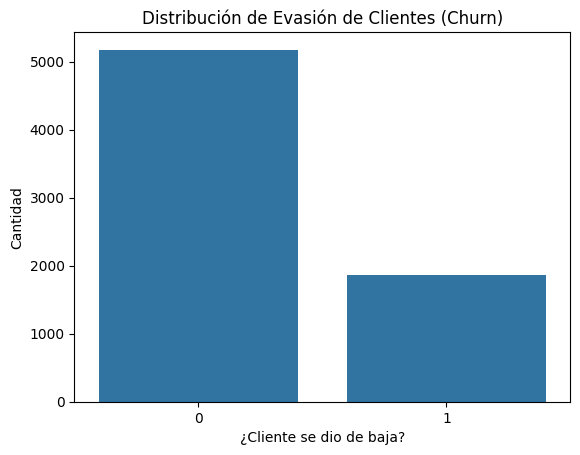

In [21]:
sns.countplot(data=df_clean, x='Churn')
plt.title("Distribución de Evasión de Clientes (Churn)")
plt.xlabel("¿Cliente se dio de baja?")
plt.ylabel("Cantidad")
plt.show()

In [22]:
churn_rate = df_clean['Churn'].value_counts(normalize=True) * 100
print("Porcentaje de evasión:\n", churn_rate)

Porcentaje de evasión:
 Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


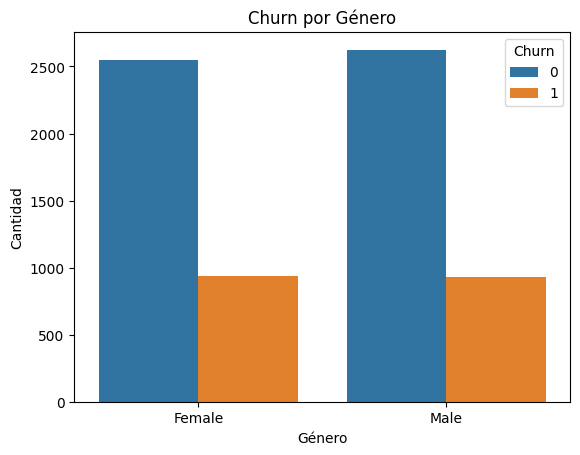

In [23]:
sns.countplot(data=df_clean, x='customer.gender', hue='Churn')
plt.title("Churn por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

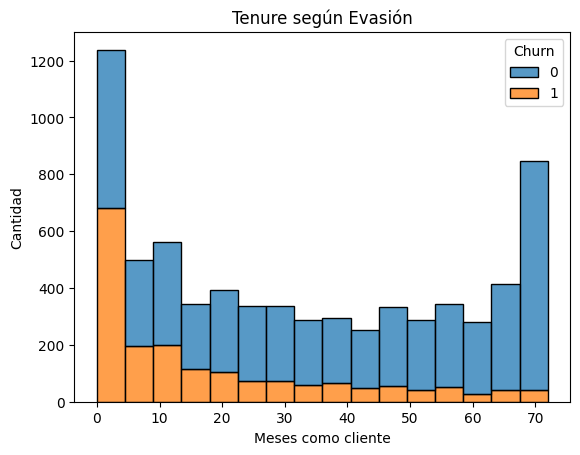

In [33]:
sns.histplot(data=df_clean, x='customer.tenure', hue='Churn', multiple='stack')
plt.title("Tenure según Evasión")
plt.xlabel("Meses como cliente")
plt.ylabel("Cantidad")
plt.show()

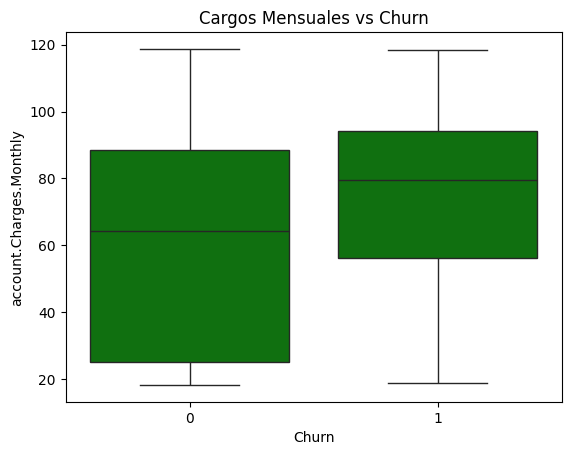

In [29]:
sns.boxplot(data=df_clean, x='Churn', y='account.Charges.Monthly', color='rocket')
plt.title("Cargos Mensuales vs Churn")
plt.show()

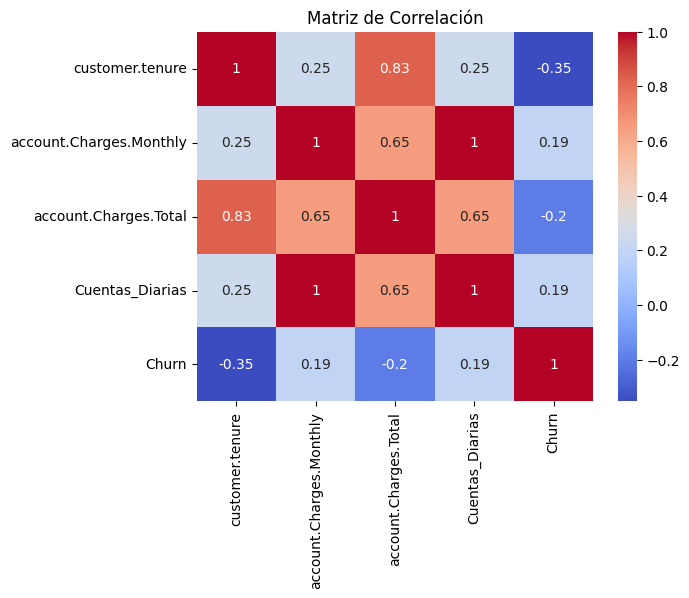

In [26]:
df_corr = df_clean[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias', 'Churn']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

#📄Informe final

## 1. Introducción

#### Objetivo:
Telecom X enfrenta una alta tasa de cancelación de clientes (churn). El propósito de este análisis es identificar patrones que expliquen por qué los clientes abandonan el servicio y aportar insights para ayudar a retenerlos.

## 2. Limpieza y Tratamiento de Datos

#### Acciones realizadas:

Se extrajeron los datos desde un archivo JSON y se aplanaron para convertirlos a un DataFrame de Pandas.

Se convirtieron valores categóricos como "Yes"/"No" a binarios (1/0).

Se reemplazaron valores irrelevantes como "No internet service" por "No" para normalizar las respuestas.

Se convirtió account.Charges.Total a numérico.

Se eliminaron registros con valores vacíos en la columna Churn.

Se creó una columna nueva llamada Cuentas_Diarias (costo mensual dividido por 30) para un análisis más granular.

## 3. Análisis Exploratorio de Datos (EDA)

Distribución de Churn
El ~26% de los clientes se dio de baja.

Clientes con contratos mensuales o que pagan con cheque electrónico presentaron mayores tasas de churn.

🔹 Variables demográficas
No se encontraron grandes diferencias de churn por género.

Adultos mayores (SeniorCitizen) y personas sin pareja o dependientes tienden a cancelar más.

🔹 Servicios contratados
El uso de servicios como soporte técnico, respaldo online y seguridad en línea parece estar asociado con menor evasión.

Clientes sin servicio de internet o con solo servicio telefónico rara vez se dan de baja (probablemente ya pagan poco).

🔹 Cargos y duración
Clientes con menor tenure (recién ingresados) tienden a cancelar más.

El churn disminuye a medida que aumenta la antigüedad del cliente.

En promedio, los clientes que se dan de baja pagan más por mes pero menos en total, sugiriendo insatisfacción temprana.

## 4. Conclusiones e Insights

La mayoría de los clientes que abandonan el servicio lo hacen en los primeros meses del contrato.

Contratos de mes a mes y métodos de pago menos automáticos se correlacionan con una mayor tasa de churn.

Servicios adicionales como soporte técnico y respaldo en línea parecen actuar como factores de retención.

El churn no se explica fuertemente por características como género, pero sí por la combinación de tiempo, tipo de contrato y uso de servicios.

## 5. Recomendaciones

Ofrecer incentivos durante los primeros meses del contrato para retener nuevos clientes.

Promover contratos anuales o bianuales con descuentos atractivos.

Fomentar el uso de servicios adicionales con bundles gratuitos por 1-2 meses.

Incentivar métodos de pago automáticos (transferencia bancaria, tarjeta).

Desarrollar un modelo predictivo de churn enfocado en clientes nuevos con altos cargos y poco engagement.